# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Study-AI/step4')

# keras

## 線形回帰

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 2.7498865127563477
Generation: 20. 誤差 = 1.5203368663787842
Generation: 30. 誤差 = 0.9866284728050232
Generation: 40. 誤差 = 0.7120912075042725
Generation: 50. 誤差 = 0.5467914938926697
Generation: 60. 誤差 = 0.43490055203437805
Generation: 70. 誤差 = 0.35333630442619324
Generation: 80. 誤差 = 0.29108503460884094
Generation: 90. 誤差 = 0.24211595952510834
Generation: 100. 誤差 = 0.20276479423046112
Generation: 110. 誤差 = 0.17064040899276733
Generat

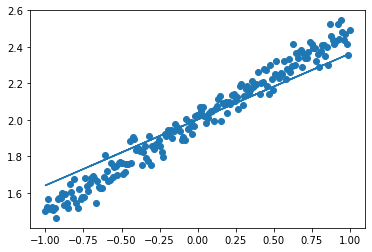

In [19]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, units=1))
model.add(Dense(input_dim=1, units=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

# 考察
- 層を多くすると、少ないイタレーション回数では回帰曲線がずれやすくなる＝学習の進みが遅くなると推察

## 単純パーセプトロン 
OR回路

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
        False,True,True,True
-  エポック数を100に変更
        True, True,True,True
-  AND回路, XOR回路に変更
        OR, ANDは線形分離可能だが, XORは線形分離不可能なので学習できない
-  OR回路にしてバッチサイズを10に変更
        False,True,True,True
-  エポック数を300に変更しよう
        True, True,True,True
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(2)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=100, batch_size=10)
 
# トレーニングの入力を流用して実際に分類
# Y = model.predict_classes(X, batch_size=1)
predict_x = model.predict(X) 
Y = np.argmax(predict_x, axis=1)

print("TEST")
print(Y == T)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
 activation_15 (Activation)  (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 351ms/step - loss: 0.8356
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8100
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7861
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7640
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7433
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7241
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7062
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6895
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6740
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6595
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6460
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6335
Epoch 13/100
1/1 [==============================] - 0s 7ms/step - l

## 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                60        
                                                                 
 activation_20 (Activation)  (None, 12)                0         
                                                                 
 dense_35 (Dense)            (None, 3)                 39        
                                                                 
 activation_21 (Activation)  (None, 3)                 0         
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 1s 17ms/step - loss: 1.1575 - accuracy: 0.3500 - val_loss: 1.1370 - val_accuracy: 0.2667
Epoch 2/20
24/24 [==============================

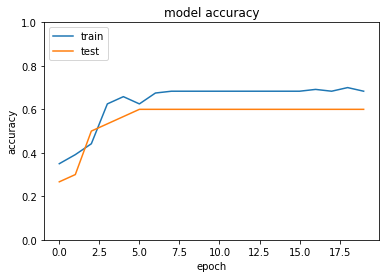

In [30]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


# 考察
- sigmoid関数では途中から学習が進まなくなる＝勾配消失が起きていると推定される

## 分類 (mnist)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 512)               262656    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


938/938 [==============================] - 6s 5ms/step - loss: 0.2208 - accuracy: 0.9332 - val_loss: 0.0976 - val_accuracy: 0.9696
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1010 - accuracy: 0.9690 - val_loss: 0.0895 - val_accuracy: 0.9722
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0750 - accuracy: 0.9759 - val_loss: 0.0653 - val_accuracy: 0.9782
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0648 - val_accuracy: 0.9802
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0696 - val_accuracy: 0.9793
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0670 - val_accuracy: 0.9800
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0670 - val_accuracy: 0.9807
Epoch 8/20
938/93

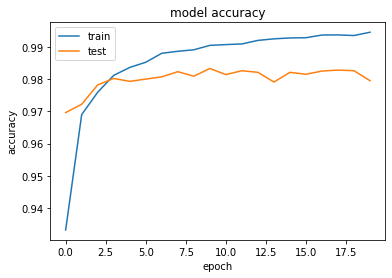

In [33]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 64
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

# 考察
- 若干の過学習の傾向があるが、小さいバッチサイズとエポック数で分類可能である
- カテゴリ分類に対しては、sparse_categorical_crossentropyが有効に機能する

## CNN分類 (mnist)
#### 実行に時間がかかるため割愛

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                      

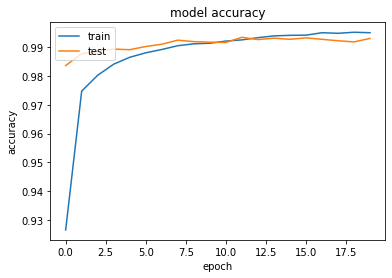

In [9]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)


# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## cifar10
#### 実行に時間がかかるため割愛
データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [12]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from tensorflow.keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Epoch 1/20
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5160 - accuracy: 0.4450
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1399 - accuracy: 0.5964
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0052 - accuracy: 0.6451
Epoch 4/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9203 - accuracy: 0.6775
Epoch 5/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8503 - accuracy: 0.7040
Epoch 6/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8041 - accuracy: 0.7197
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7633 - accuracy: 0.7319
Epoch 8/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7288 - accuracy: 0.7418
Epoch 9/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7025 - accuracy: 0.7542
Epoch 10/20
1563/1563 [==============================] - 18s 11m

## RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [14]:
import tensorflow as tf

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from tensorflow.keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8, 16)             304       
                                                                 
 dense_14 (Dense)            (None, 8, 1)              17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5000/5000 [==============================] - 37s 7ms/step - loss: 0.1184 - accuracy: 0.8391
Epoch 2/5
5000/5000 [==============================] - 36s 7ms/step - loss: 0.0150 - accuracy: 0.9965
Epoch 3/5
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/5
5000/5000 [==============================] - 35s 7ms/step - loss: 9.6121e-04 - accuracy: 1.0000
Epoch 5/5
5000/5000 [==============================] - 36s 7ms/step - loss: 6.3143e-04 - accuracy: 1.0000
Test loss: 0.0005362930824048817
Test accuracy: 1.0
